# Simple Linear Regression - Lab

## Introduction

Regression analysis forms the basis of machine learning experiments. Understanding regression will help you to get the foundations of most machine learing algorithms. Ever wondered what's at the heart of an artificial neural network processing unstructured data like music and graphics? It can be linear regression!


## Objectives

You will be able to:

* Calculate the slope of a line using standard slope formula 
* Calculate the y-intercept using the slope value
* Draw a regression line based on calculated slope and intercept
* Predict the label of a previously unseen data element



## Let's get started 

A first step towards understanding regression is getting a clear idea about "linear" regression and basic linear algebra. 

The calculation for the best-fit line's slope, `m` is calculated as :
![](best-fit-slope.png)


As in our previous lesson, let's break down the formula into its parts. First we shall import the required libraries and define some data points to work with. We shall first create some toy data as numpy arrays. Let's do this for you to give you a head start. 

In [3]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

# Initialize vectors X and Y with given values and create a scatter plot
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

## Show a scatter plot between X and Y and comment on the output 

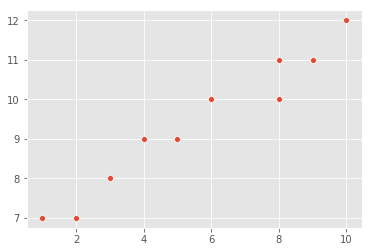

In [4]:
# Scatter plot
sns.scatterplot(x = X, y = Y)

In [5]:
# Your observations about relationship in X and Y 

# There appears to be a positive linear relationship between X and Y from looking at the graph.

#

In a data analysis context, we can think of these points as two vectors:

* **vector X**: the features of our model
* **vector Y**: the labels for given features

## Write a function calc_slope()

Write a function `calc_clope()` that takes in x and y vectors and calculates the slope using the formula shown above. 

In [6]:
# Write the function to calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
def calc_slope(xs,ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    x_times_y = (np.array(xs) * np.array(ys)) 
    xy_mean = np.mean(x_times_y)
    x_mean_2 = x_mean**2
    x_2 = np.power(xs, 2)
    x_2_mean = np.mean(x_2)
    numerator = (x_mean * y_mean) - xy_mean
    denominator = x_mean_2 - x_2_mean
    return numerator / denominator

calc_slope(X,Y)

# 0.5393518518518512

0.5393518518518512

Great, so we have our slope. Next we calculate the intercept. 

As a reminder, the calculation for the best-fit line's y-intercept is:

![](best-fit-y-intercept.png)

## Write a function best_fit()

Write a function `best_fit()` that takes in X and Y, calculates the slope using above above  and intercept using the formula. The function should return slope and intercept values. 

In [8]:
# use the slope function with intercept formula to return calculate slop and intercept from data points

def best_fit(xs,ys):
    
    slope = calc_slope(xs, ys)
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    y_intercept = y_mean - (slope * x_mean)
    return slope, y_intercept
    
# Uncomment below to test your function

m, b = best_fit(X,Y)
m,b
m
# (0.5393518518518512, 6.379629629629633)

0.5393518518518512

We now have a working model with `m` and `b` as model parameters. We can create a line for the data points using the calculated slope and intercept:

* Recall that `y=mx+b`. We can now use slope and intercept values along with X data points (features) to calculate the Y data points (labels) of the regression line. 

## Write a function reg_line() 

Write a function `reg_line()` that takes in slope, intercept and X vector and calculates the regression line using Y= mX+b for each point in X.

In [9]:
def reg_line (m, b, xs):
    xs_size = xs.size
    y = np.empty(xs_size)
    y.fill(np.nan)
    index = 0
    for x in xs:
        y_value = (m * x) + b
        y[index] = y_value
        index += 1
    return y

# Uncomment below
regression_line = reg_line(m,b,X)
regression_line

array([ 6.91898148,  7.45833333,  7.99768519,  8.53703704,  9.07638889,
        9.61574074, 10.69444444, 10.69444444, 11.2337963 , 11.77314815])

## Plot the (x,y) data points and draw the calculated regression line for visual inspection

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


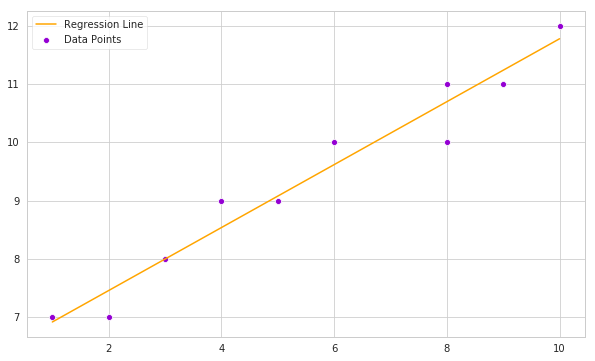

In [23]:
# Plot data and regression line
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")

sns.scatterplot(x = X, y = Y, label = "Data Points", **{"color":"darkviolet"})
sns.lineplot(x = X, y = regression_line, **{"color":"orange"}, label = "Regression Line")
plt.legend()
plt.show()

So there we have it, our least squares regression line. This is the best fit line and does describe the data pretty well (still not perfect though). 

## Describe your Model Mathematically and in words

In [9]:
# Your answer here




## Predicting label for new data

So, how might you go about actually making a prediction based on this model you just made?

Now that we have a working model with m and b as model parameters. We can fill in a value of x with these parameters to identify a corresponding value of y according to our model. Recall the formula 
![](pred.jpg)

Let's try to find a y prediction for a new value of x = 7 and unknown y, and plot the new prediction with existing data 

In [25]:
x_new = 7
y_predicted = m * x_new + b
y_predicted

# 10.155092592592592

10.155092592592592

## Plot the prediction with actual data and regression line 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


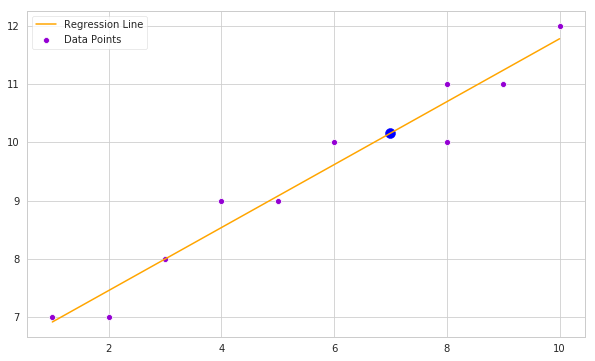

In [38]:
# Plot as above and show the predicted value
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")

sns.scatterplot(x = X, y = Y, label = "Data Points", **{"color":"darkviolet"})
plt.scatter(x_new, y_predicted, marker='o', s=100, color = "b")
sns.lineplot(x = X, y = regression_line, **{"color":"orange"}, label = "Regression Line")
plt.legend()
plt.show() 



We now know how to create our own models, which is great, but we're stilling missing something integral: how accurate is our model? This is the topic for discussion in the next lab.

## Summary

In this lesson, we learnt how we can draw a best fit line for given data labels and features, by first calculating the slope and intercept. The calculated regression line was then used to predict the label (y-value) of a previously unseen feature (x-value). The lesson uses a simple set of data points for demonstration. Students should be able to plug in other datasets and practice with predictions for accuracy. 